In [1]:
import random
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
start_date = date(2020, 1, 1)
end_date = date(2021, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(100)]
sales_data = [random.randint(1, 50) for _ in range(100)]
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(40)

,Date,Sales
0,2020-01-02,9
1,2020-01-14,35
2,2020-01-14,15
3,2020-01-15,38
4,2020-01-17,25
5,2020-01-24,6
6,2020-01-27,8
7,2020-01-30,37
8,2020-02-02,5
9,2020-02-13,6


Missing Values:
 Date     0
Sales    0
dtype: int64

Data Types:
 Date     object
Sales     int64
dtype: object

Summary Statistics:
             Sales
count  100.000000
mean    24.550000
std     13.745431
min      1.000000
25%     12.000000
50%     26.000000
75%     37.000000
max     48.000000

Duplicate Rows:
 Empty DataFrame
Columns: [Date, Sales]
Index: []


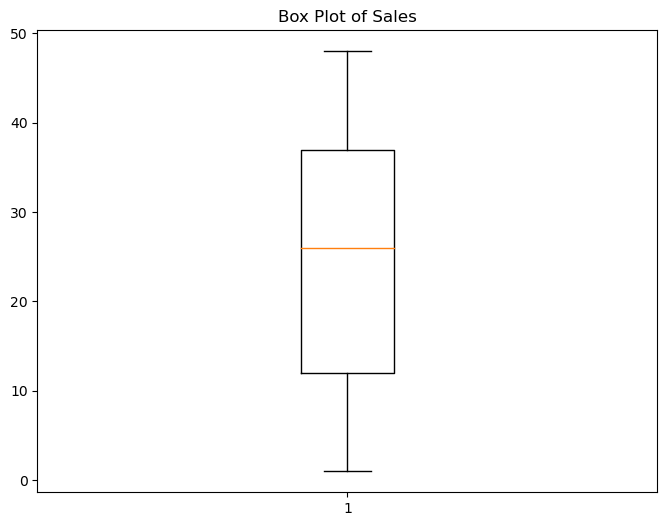

In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
data_types = df.dtypes
print("\nData Types:\n", data_types)
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicates)
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.title('Box Plot of Sales')
plt.show()
df.to_csv('sales_dataset.csv', index=False)


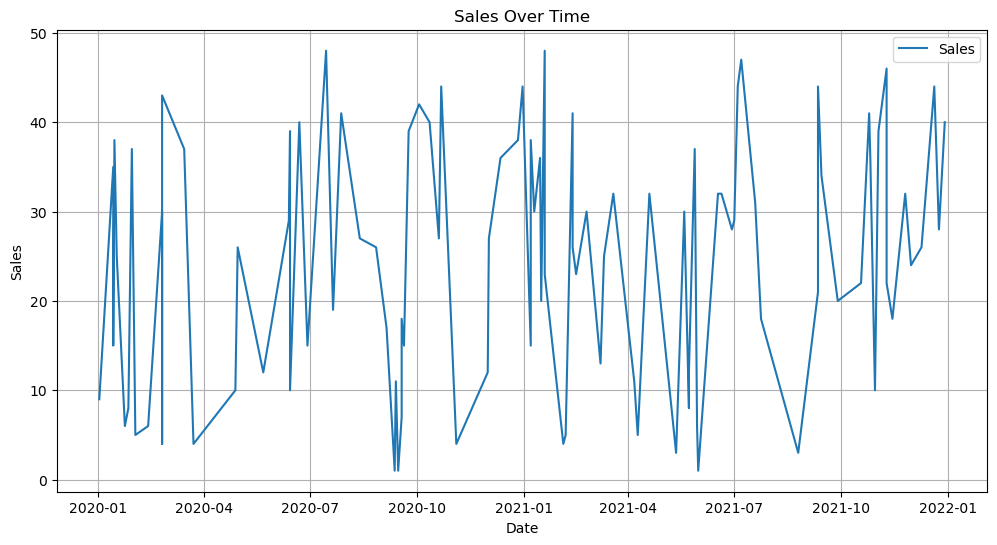

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


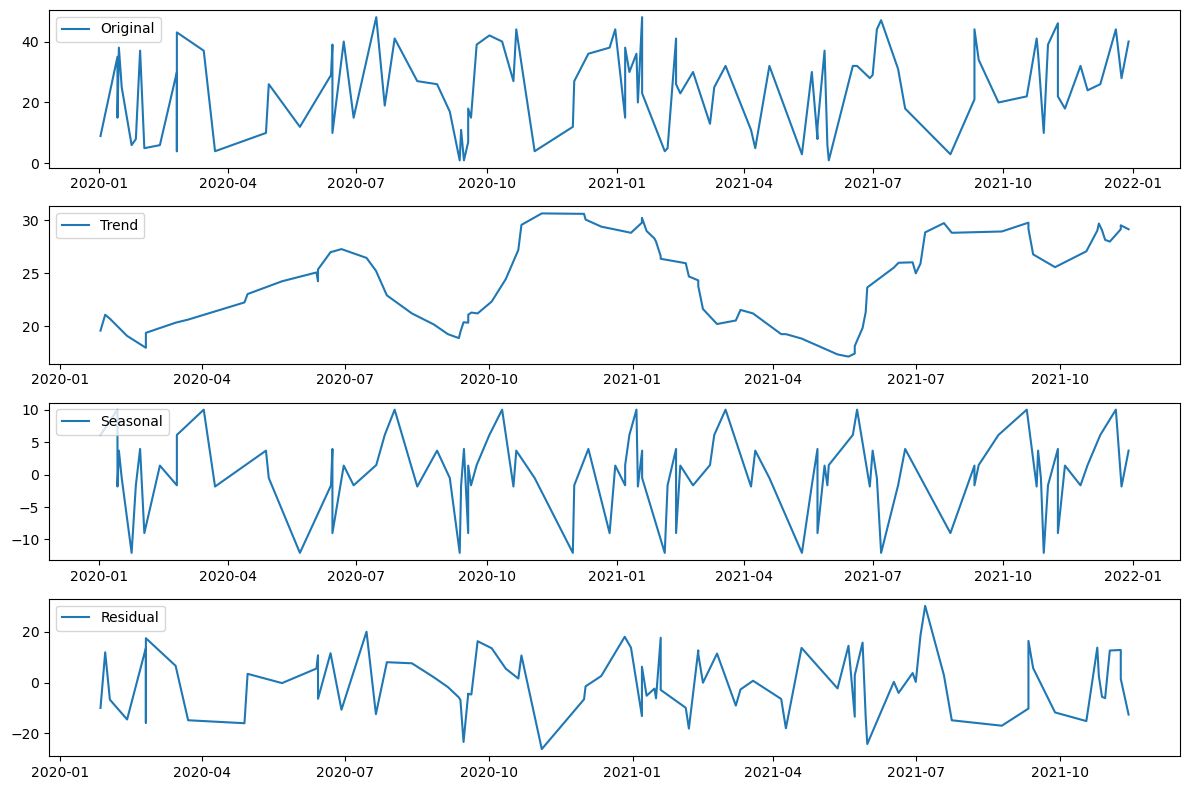

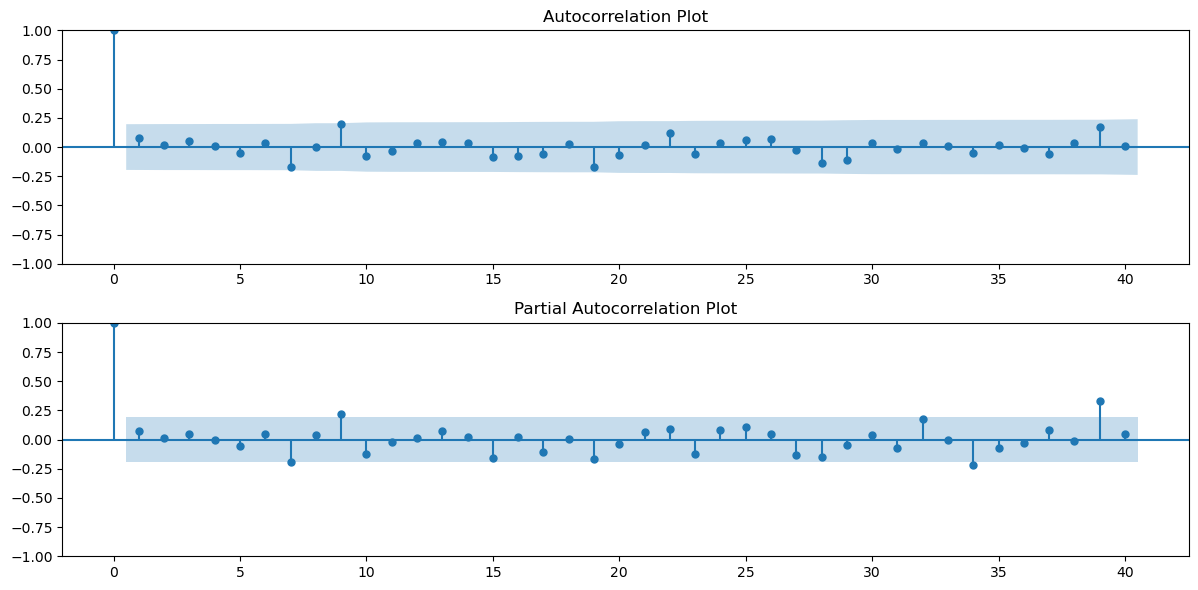

In [6]:
df = pd.read_csv('sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12) # Assumingmonthly data (12 months in a year)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Sales'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')
plt.subplot(2, 1, 2)
plot_pacf(df['Sales'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')
plt.tight_layout()
plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


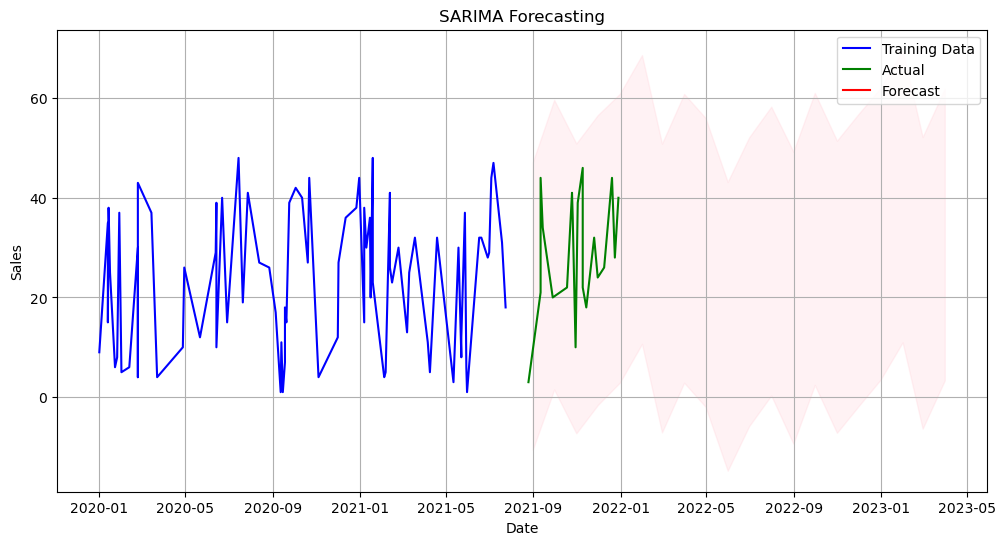

In [8]:
df = pd.read_csv('sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]
sarima_model = SARIMAX(train_data['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s)
)
sarima_result = sarima_model.fit(disp=False)
forecast_steps = len(test_data)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast_values, index=forecast_index)
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Sales'], label='Actual', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:,
1], color='pink', alpha=0.2)
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
mse = mean_squared_error(test_data['Sales'], forecast_values)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


RMSE: 11.62


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


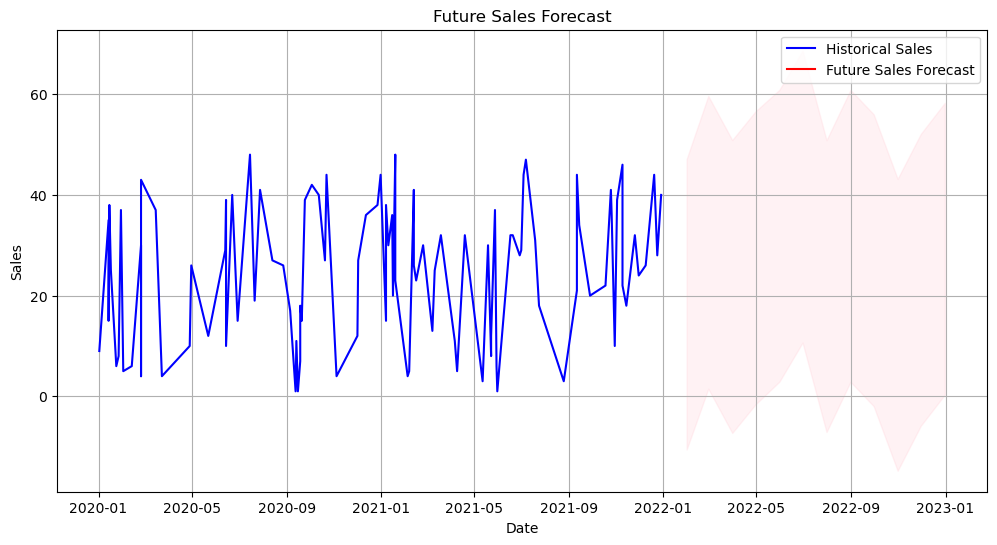

In [14]:
forecast_horizon = 12
forecast_steps = forecast_horizon
future_forecast = sarima_result.get_forecast(steps=forecast_steps)
future_forecast_conf_int = future_forecast.conf_int()
forecast_start_date = df.index[-1] + pd.DateOffset(months=1)
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M')
future_forecast_values = future_forecast.predicted_mean
future_forecast_series = pd.Series(future_forecast_values, index=forecast_index)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales', color='blue')
plt.plot(future_forecast_series.index, future_forecast_series, label='Future Sales Forecast', color='red')
plt.fill_between(future_forecast_series.index, future_forecast_conf_int.iloc[:, 0], future_forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
